In [ ]:
#Install necessary libraries if necessary
# !python -m pip uninstall tensorflow
# !python -m pip uninstall keras

!python -m pip install tensorflow==2.10
!python -m pip install keras==2.10
!python -m pip install matplotlib
!python -m pip install numpy
!python -m pip install seaborn
!python -m pip install pandas
!python -m pip install cv2
!python -m pip install scikit-learn
#!python -m pip install scikitplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 897.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 42.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator

# ***EKSPERYMENTY BEZ WYKORZYSTANIA WSTĘPNIE OBLICZONYCH ELEMENTÓW DO OSADZENIA***
zdecydowałem się na takie rozwiązanie przez problem z dostępem do surowych danych IMDB, ostateczne eksperymenty po znalezieniu najlepszych parametrów zrobione będą dla Glove i alternatyw


In [1]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, Dense
from keras import regularizers


print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.10.0
Keras version: 2.10.0


In [ ]:
from keras.datasets import imdb
from keras import preprocessing
from keras_preprocessing.sequence import pad_sequences

max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 200

# Load the data as lists of integers.
(x_train_o, y_train_o), (x_test_o, y_test_o) = imdb.load_data(num_words=max_features)
# This turns our lists of integers into a 2D integer tensor of shape `(samples, maxlen)`

x_train_pre = x_train_o
# x_train_o = pad_sequences(x_train_o, maxlen=maxlen)
# x_test_o = pad_sequences(x_test_o, maxlen=maxlen)

# training_samples = 2000
# validation_samples = 10000
# embedding_dim = 200

# x_train = x_train_o[:training_samples]
# y_train = y_train_o[:training_samples]
# x_val = x_train_o[training_samples: training_samples + validation_samples]
# y_val = y_train_o[training_samples: training_samples + validation_samples]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test_o.shape, y_test_o.shape)

(2000, 200) (2000,)
(10000, 200) (10000,)
(25000, 200) (25000,)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, Dense
from keras import regularizers

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(x_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          2000000   
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dropout (Dropout)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 16)                640016    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,640,033
Trainable params: 2,640,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
63/63 [============================

In [8]:
import matplotlib.pyplot as plt

def plot_history(history, training_samples, max_words):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    plt.title(f'Loss training samples: {training_samples}, max_words: {max_words}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title(f'Accuracy training samples: {training_samples}, max_words: {max_words}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [9]:
import numpy as np
def plot_histories(history_dicts, all_training_params):

  losses = [h['loss'] for h in history_dicts]
  val_losses = [h['val_loss'] for h in history_dicts]
  accs = [h['acc'] for h in history_dicts]
  val_accs = [h['val_acc'] for h in history_dicts]

  cmap = plt.cm.rainbow(np.linspace(0, 1, len(losses)))

  plt.figure(1)
  for i, l in enumerate(losses):
    training_samples = all_training_params[i][0]
    max_words = all_training_params[i][1]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'train loss, samples:{training_samples}, max_words:{max_words}')
  plt.title('Training losses')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.figure(2)
  for i, l in enumerate(val_losses):
    training_samples = all_training_params[i][0]
    max_words = all_training_params[i][1]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'val loss, samples:{training_samples}, max_words:{max_words}')
  plt.title('Validation losses')
  plt.xlabel('Epochs')
  plt.ylabel('Val Loss')
  plt.legend()

  plt.figure(3)
  for i, l in enumerate(accs):
    training_samples = all_training_params[i][0]
    max_words = all_training_params[i][1]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'accuracy, samples:{training_samples}, max_words:{max_words}')
  plt.title('Accuracies')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracies')
  plt.legend()

  plt.figure(4)
  for i, l in enumerate(val_accs):
    training_samples = all_training_params[i][0]
    max_words = all_training_params[i][1]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'val accuracy, samples:{training_samples}, max_words:{max_words}')
  plt.title('Val Accuracies')
  plt.xlabel('Epochs')
  plt.ylabel('Val Accuracies')
  plt.legend()



  plt.show()


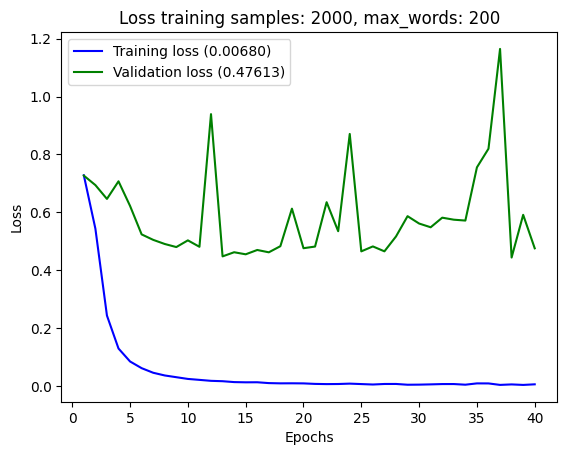

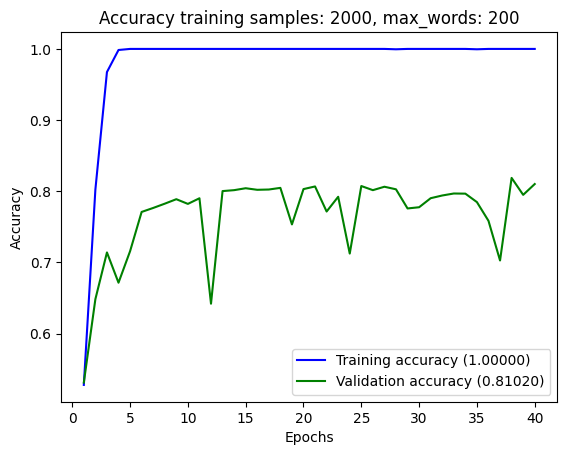

In [ ]:
plot_history(history, training_samples, maxlen)

In [ ]:
history_dict1 = history.history
training_params1 = (training_samples, maxlen)
all_histories_dict = [history_dict1]
all_training_params = [training_params1]
print(len(all_histories_dict))

1


# Modyfikacja liczby danych treningowych

In [ ]:
def learning_process(training_samples=2000, max_words=200):
  max_features = 10000

  # training_samples = 2000
  validation_samples = 10000
  embedding_dim = 200

  x_train_o = pad_sequences(x_train_pre, maxlen=max_words)

  x_train = x_train_o[:training_samples]
  y_train = y_train_o[:training_samples]
  x_val = x_train_o[training_samples: training_samples + validation_samples]
  y_val = y_train_o[training_samples: training_samples + validation_samples]

  model = Sequential()
  model.add(Embedding(max_features, embedding_dim, input_length=max_words))
  model.add(Flatten())
  model.add(Dropout(0.3))
  model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(1, activation='sigmoid'))
  # model.summary()

  early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10)

  model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
  history = model.fit(x_train, y_train,
                      epochs=40,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping])

  # plot_history(history, training_samples, max_words)
  all_histories_dict.append(history.history)
  all_training_params.append((training_samples, max_words))

  return history


Epoch 1/40
157/157 [==============================] - 12s 70ms/step - loss: 0.7195 - acc: 0.5764 - val_loss: 0.6426 - val_acc: 0.7045
Epoch 2/40
157/157 [==============================] - 14s 90ms/step - loss: 0.3572 - acc: 0.9092 - val_loss: 0.5762 - val_acc: 0.7817
Epoch 3/40
157/157 [==============================] - 10s 61ms/step - loss: 0.1593 - acc: 0.9908 - val_loss: 0.6446 - val_acc: 0.7561
Epoch 4/40
157/157 [==============================] - 8s 53ms/step - loss: 0.0983 - acc: 0.9988 - val_loss: 0.4779 - val_acc: 0.8219
Epoch 5/40
157/157 [==============================] - 8s 53ms/step - loss: 0.0685 - acc: 0.9986 - val_loss: 0.4517 - val_acc: 0.8214
Epoch 6/40
157/157 [==============================] - 10s 63ms/step - loss: 0.0491 - acc: 1.0000 - val_loss: 0.4403 - val_acc: 0.8307
Epoch 7/40
157/157 [==============================] - 11s 69ms/step - loss: 0.0386 - acc: 1.0000 - val_loss: 0.6941 - val_acc: 0.7542
Epoch 8/40
157/157 [==============================] - 12s 74ms/s

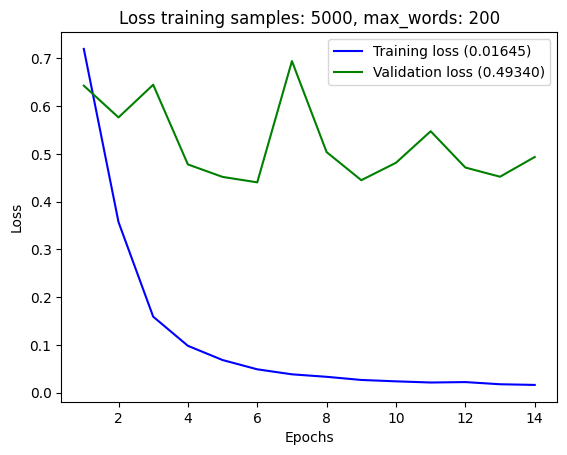

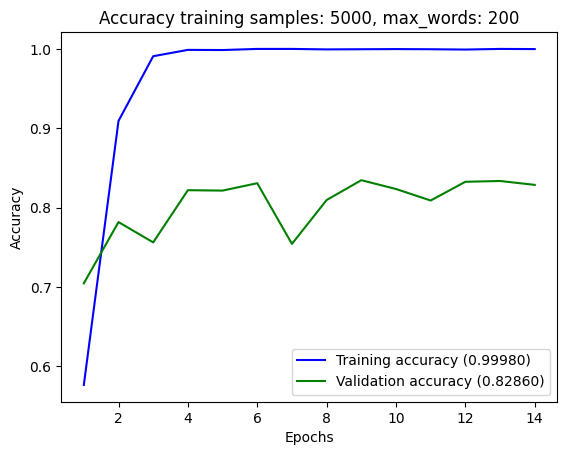

In [ ]:
training_samples = 5000
max_words = 200
history2 = learning_process(training_samples, max_words)
plot_history(history2, training_samples, max_words)

Epoch 1/40
313/313 [==============================] - 18s 53ms/step - loss: 0.6236 - acc: 0.6894 - val_loss: 0.5162 - val_acc: 0.8070
Epoch 2/40
313/313 [==============================] - 16s 50ms/step - loss: 0.3059 - acc: 0.9300 - val_loss: 0.4956 - val_acc: 0.8315
Epoch 3/40
313/313 [==============================] - 16s 52ms/step - loss: 0.1637 - acc: 0.9848 - val_loss: 0.4567 - val_acc: 0.8513
Epoch 4/40
313/313 [==============================] - 16s 52ms/step - loss: 0.1042 - acc: 0.9943 - val_loss: 0.4419 - val_acc: 0.8515
Epoch 5/40
313/313 [==============================] - 15s 48ms/step - loss: 0.0716 - acc: 0.9976 - val_loss: 0.4389 - val_acc: 0.8488
Epoch 6/40
313/313 [==============================] - 15s 48ms/step - loss: 0.0560 - acc: 0.9983 - val_loss: 0.4440 - val_acc: 0.8469
Epoch 7/40
313/313 [==============================] - 20s 62ms/step - loss: 0.0454 - acc: 0.9986 - val_loss: 0.5086 - val_acc: 0.8415
Epoch 8/40
313/313 [==============================] - 20s 64ms

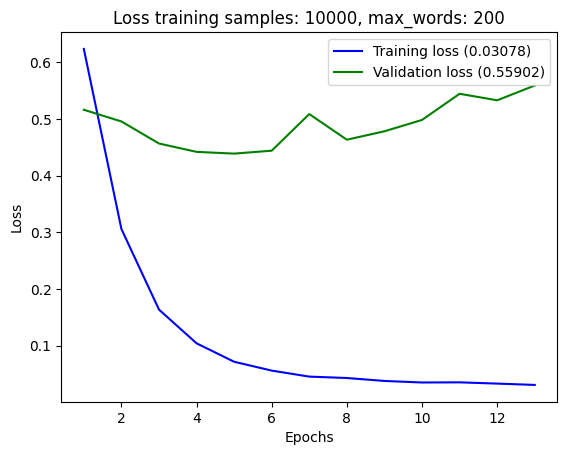

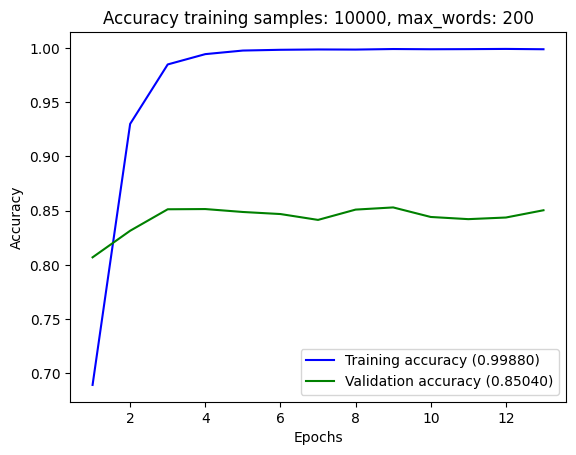

In [ ]:
training_samples = 10000
max_words = 200
history2 = learning_process(training_samples, max_words)
plot_history(history2, training_samples, max_words)

Epoch 1/40
469/469 [==============================] - 24s 50ms/step - loss: 0.5710 - acc: 0.7307 - val_loss: 0.4467 - val_acc: 0.8489
Epoch 2/40
469/469 [==============================] - 22s 47ms/step - loss: 0.2940 - acc: 0.9321 - val_loss: 0.4330 - val_acc: 0.8611
Epoch 3/40
469/469 [==============================] - 23s 48ms/step - loss: 0.1650 - acc: 0.9819 - val_loss: 0.4808 - val_acc: 0.8468
Epoch 4/40
469/469 [==============================] - 21s 44ms/step - loss: 0.1050 - acc: 0.9923 - val_loss: 0.4461 - val_acc: 0.8576
Epoch 5/40
469/469 [==============================] - 22s 47ms/step - loss: 0.0767 - acc: 0.9957 - val_loss: 0.4613 - val_acc: 0.8553
Epoch 6/40
469/469 [==============================] - 22s 47ms/step - loss: 0.0589 - acc: 0.9979 - val_loss: 0.4897 - val_acc: 0.8470
Epoch 7/40
469/469 [==============================] - 23s 50ms/step - loss: 0.0517 - acc: 0.9972 - val_loss: 0.5236 - val_acc: 0.8416
Epoch 8/40
469/469 [==============================] - 21s 45ms

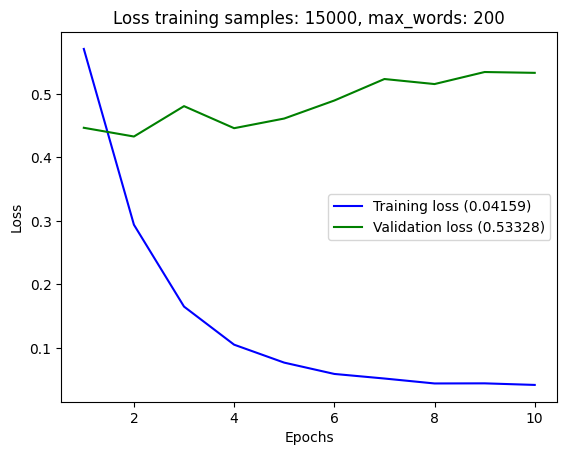

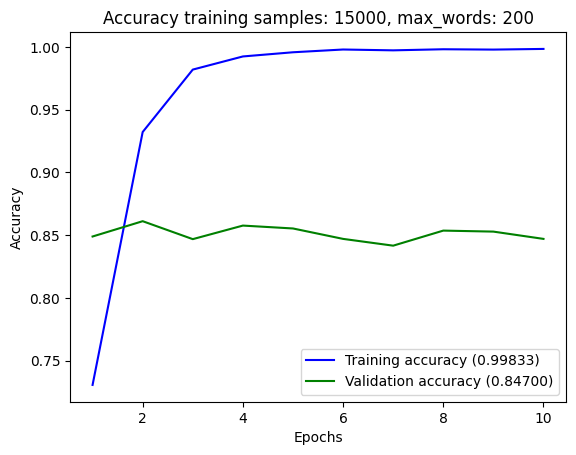

In [ ]:
training_samples = 15000
max_words = 200
history2 = learning_process(training_samples, max_words)
plot_history(history2, training_samples, max_words)

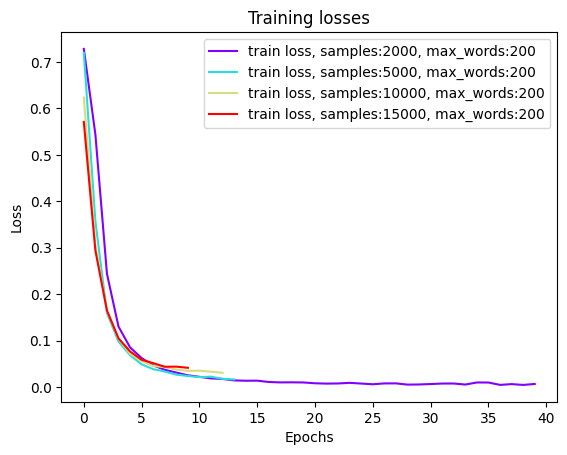

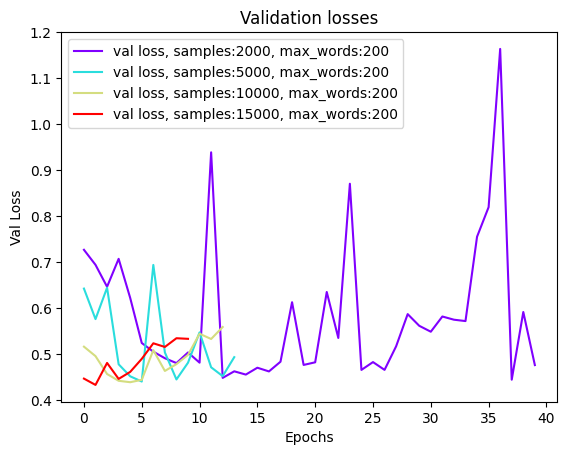

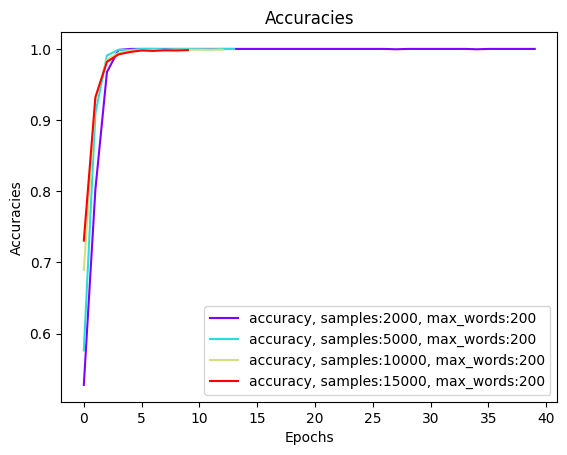

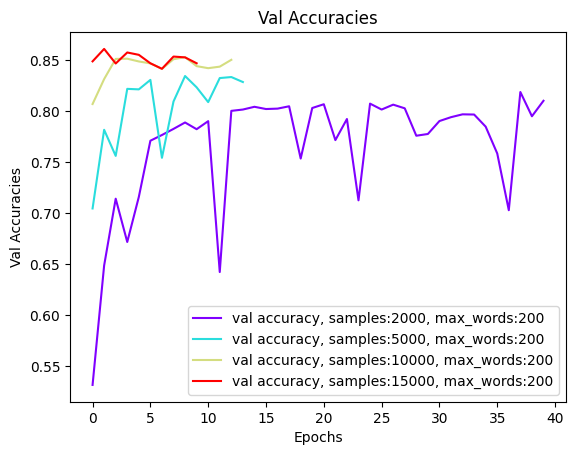

In [ ]:
plot_histories(all_histories_dict, all_training_params)

# **WNIOSKI 1**
- Zwiększenie liczby danych uczących korzystnie wpływa na proces uczenia,
wciąż szybko dochodzi do przeuczenia modelu, stąd wykorzystany early stopping ale modele uzyskują lepszą dokładność dla danych walidacyjnych, 10000 danych wydaje się optymalne

# Modyfikacja liczby słów



In [ ]:
all_histories_dict = []
all_training_params = []

Epoch 1/40
313/313 [==============================] - 11s 34ms/step - loss: 0.6009 - acc: 0.7038 - val_loss: 0.4674 - val_acc: 0.8188
Epoch 2/40
313/313 [==============================] - 12s 40ms/step - loss: 0.2933 - acc: 0.9268 - val_loss: 0.4989 - val_acc: 0.8168
Epoch 3/40
313/313 [==============================] - 10s 31ms/step - loss: 0.1509 - acc: 0.9851 - val_loss: 0.5448 - val_acc: 0.8066
Epoch 4/40
313/313 [==============================] - 9s 28ms/step - loss: 0.0912 - acc: 0.9959 - val_loss: 0.5046 - val_acc: 0.8117
Epoch 5/40
313/313 [==============================] - 9s 30ms/step - loss: 0.0609 - acc: 0.9979 - val_loss: 0.4869 - val_acc: 0.8226
Epoch 6/40
313/313 [==============================] - 8s 27ms/step - loss: 0.0449 - acc: 0.9986 - val_loss: 0.5096 - val_acc: 0.8175
Epoch 7/40
313/313 [==============================] - 11s 34ms/step - loss: 0.0356 - acc: 0.9995 - val_loss: 0.5566 - val_acc: 0.8129
Epoch 8/40
313/313 [==============================] - 12s 37ms/st

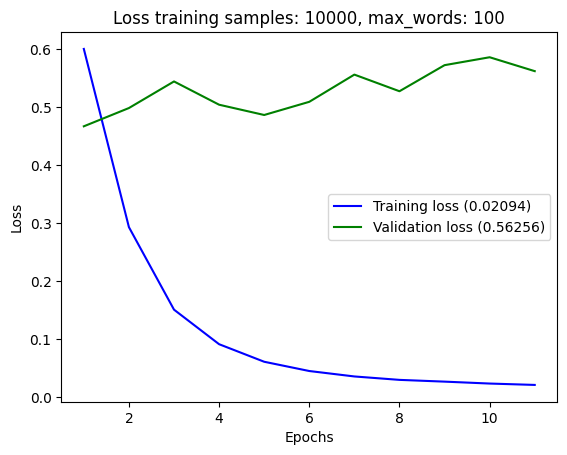

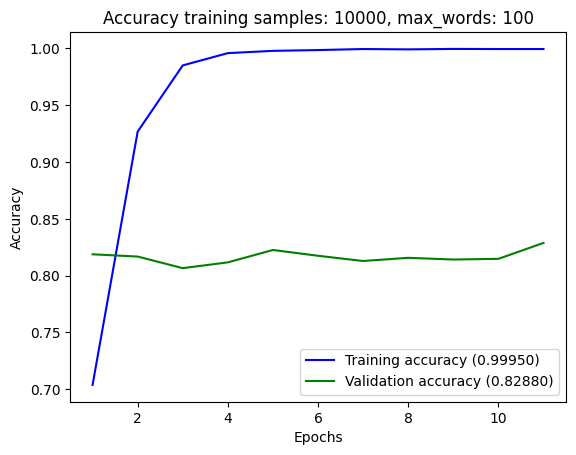

In [ ]:
training_samples = 10000
max_words = 100
history2 = learning_process(training_samples, max_words)
plot_history(history2, training_samples, max_words)

Epoch 1/40
313/313 [==============================] - 28s 86ms/step - loss: 0.6526 - acc: 0.6879 - val_loss: 0.5146 - val_acc: 0.8318
Epoch 2/40
313/313 [==============================] - 21s 68ms/step - loss: 0.3247 - acc: 0.9333 - val_loss: 0.5001 - val_acc: 0.8434
Epoch 3/40
313/313 [==============================] - 20s 63ms/step - loss: 0.1786 - acc: 0.9867 - val_loss: 0.5598 - val_acc: 0.8193
Epoch 4/40
313/313 [==============================] - 26s 85ms/step - loss: 0.1158 - acc: 0.9938 - val_loss: 0.4850 - val_acc: 0.8437
Epoch 5/40
313/313 [==============================] - 24s 78ms/step - loss: 0.0830 - acc: 0.9976 - val_loss: 0.4717 - val_acc: 0.8497
Epoch 6/40
313/313 [==============================] - 25s 79ms/step - loss: 0.0674 - acc: 0.9982 - val_loss: 0.5447 - val_acc: 0.8293
Epoch 7/40
313/313 [==============================] - 22s 69ms/step - loss: 0.0625 - acc: 0.9979 - val_loss: 0.4891 - val_acc: 0.8467
Epoch 8/40
313/313 [==============================] - 21s 66ms

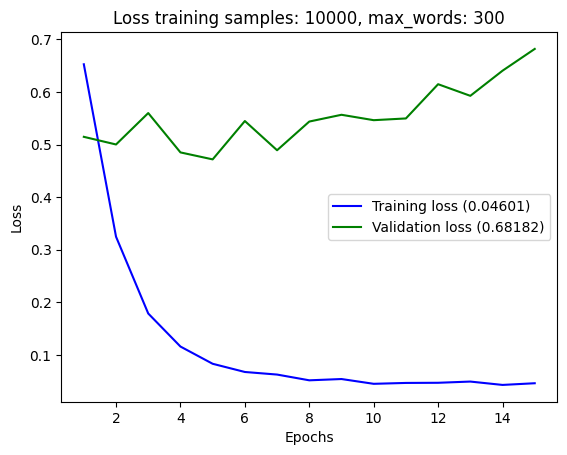

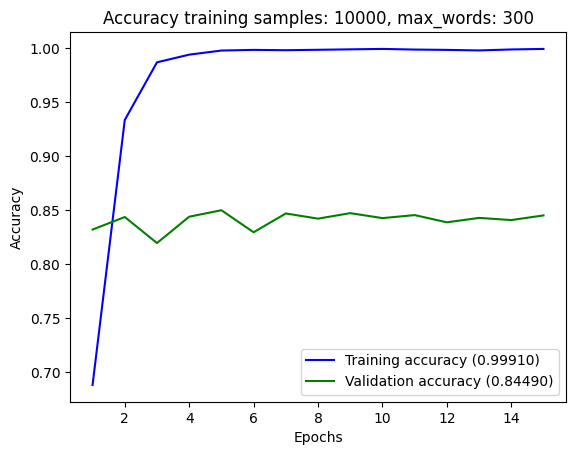

In [ ]:
training_samples = 10000
max_words = 300
history2 = learning_process(training_samples, max_words)
plot_history(history2, training_samples, max_words)

Epoch 1/40
313/313 [==============================] - 32s 100ms/step - loss: 0.6421 - acc: 0.7001 - val_loss: 0.5069 - val_acc: 0.8413
Epoch 2/40
313/313 [==============================] - 26s 84ms/step - loss: 0.3301 - acc: 0.9337 - val_loss: 0.5249 - val_acc: 0.8388
Epoch 3/40
313/313 [==============================] - 26s 82ms/step - loss: 0.1865 - acc: 0.9850 - val_loss: 0.4931 - val_acc: 0.8443
Epoch 4/40
313/313 [==============================] - 26s 82ms/step - loss: 0.1233 - acc: 0.9939 - val_loss: 0.4895 - val_acc: 0.8424
Epoch 5/40
313/313 [==============================] - 27s 88ms/step - loss: 0.0911 - acc: 0.9970 - val_loss: 0.5033 - val_acc: 0.8441
Epoch 6/40
313/313 [==============================] - 25s 79ms/step - loss: 0.0735 - acc: 0.9978 - val_loss: 0.4730 - val_acc: 0.8536
Epoch 7/40
313/313 [==============================] - 25s 80ms/step - loss: 0.0635 - acc: 0.9986 - val_loss: 0.4925 - val_acc: 0.8436
Epoch 8/40
313/313 [==============================] - 26s 82m

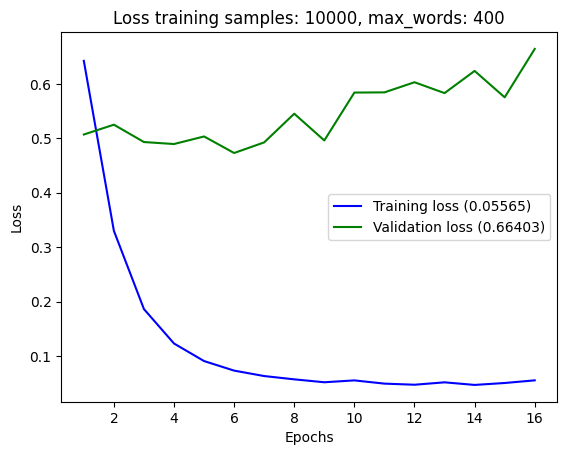

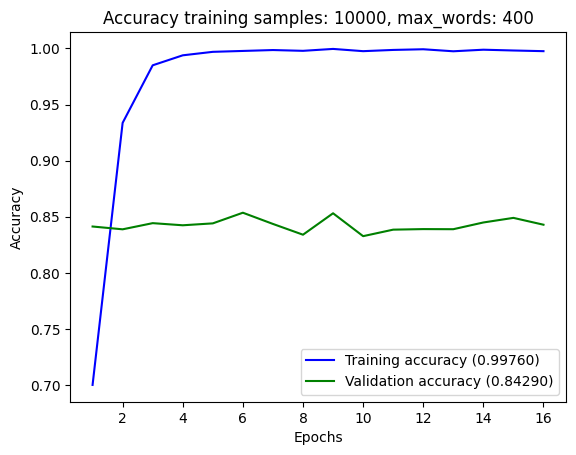

In [ ]:
training_samples = 10000
max_words = 400
history2 = learning_process(training_samples, max_words)
plot_history(history2, training_samples, max_words)

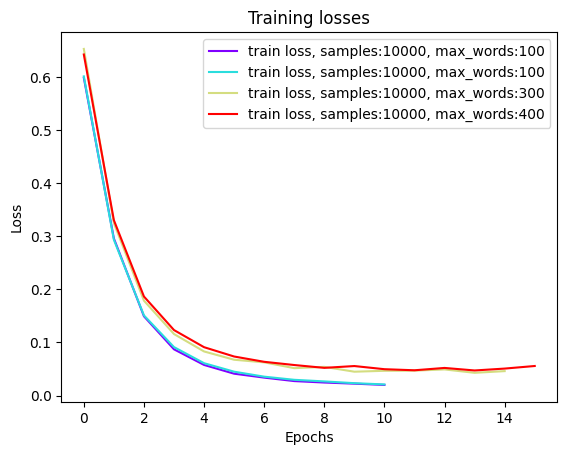

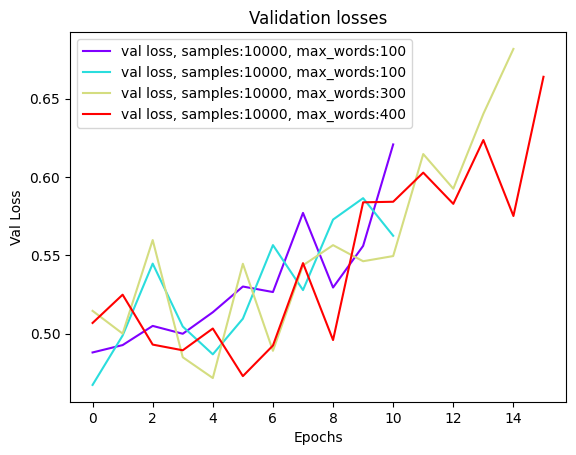

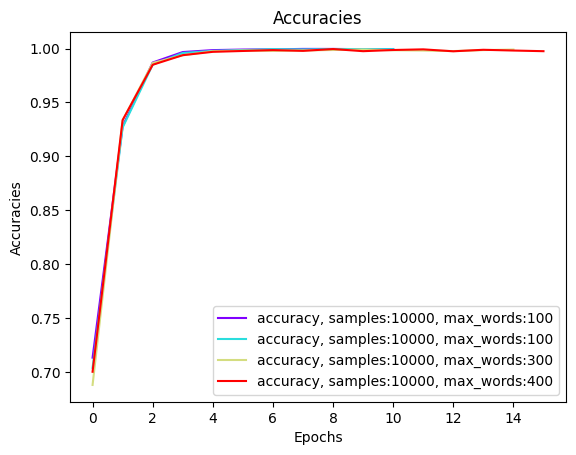

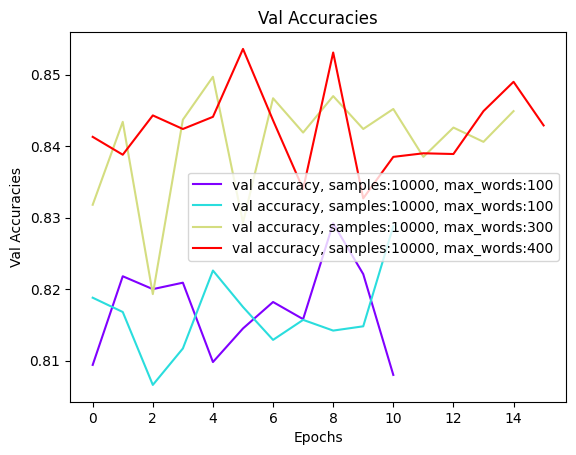

In [ ]:
plot_histories(all_histories_dict, all_training_params)

# **WNIOSKI 2**
- jak można się było spodziewać, zwiększenie liczby wykorzystanych słów pozytywnie wpływa na wyniki modelu, oczywiście kosztem czasu uczenia. 400 słów okazało się zbyt dużą liczbą i dało gorsze wyniki niż 300, więc dalej wykorzystam 300

# Modyfikacja modelu
Zapisałem tylko konkretne wyniki dla różnych modeli, żeby nie zaśmiecać notatnika

In [ ]:
def learning_process_tests(training_samples=2000, maxlen=200):
  max_features = 10000
  validation_samples = 10000
  embedding_dim = 200

  x_train_o = pad_sequences(x_train_pre, maxlen=maxlen)

  x_train = x_train_o[:training_samples]
  y_train = y_train_o[:training_samples]
  x_val = x_train_o[training_samples: training_samples + validation_samples]
  y_val = y_train_o[training_samples: training_samples + validation_samples]

  model = Sequential()
  model.add(Embedding(max_features, embedding_dim, input_length=max_words))
  model.add(Flatten())
  model.add(Dropout(0.3))
  model.add(Dense(16, activation='elu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.3))
  model.add(Dense(16, activation='elu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(1, activation='sigmoid'))

  # grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

  early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10)

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

  history = model.fit(x_train, y_train,
                      epochs=40,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping])

  # plot_history(history, training_samples, max_words)
  # all_histories_dict.append(history.history)
  # all_training_params.append((training_samples, maxlen))

  return history


Epoch 1/40
313/313 [==============================] - 23s 70ms/step - loss: 0.6477 - acc: 0.7228 - val_loss: 0.5488 - val_acc: 0.8532
Epoch 2/40
313/313 [==============================] - 22s 69ms/step - loss: 0.2782 - acc: 0.9671 - val_loss: 0.6465 - val_acc: 0.8239
Epoch 3/40
313/313 [==============================] - 20s 65ms/step - loss: 0.1773 - acc: 0.9945 - val_loss: 0.5950 - val_acc: 0.8425
Epoch 4/40
313/313 [==============================] - 22s 70ms/step - loss: 0.1202 - acc: 0.9987 - val_loss: 0.6588 - val_acc: 0.8361
Epoch 5/40
313/313 [==============================] - 23s 73ms/step - loss: 0.2144 - acc: 0.9903 - val_loss: 0.9293 - val_acc: 0.8261
Epoch 6/40
313/313 [==============================] - 22s 71ms/step - loss: 0.3187 - acc: 0.9868 - val_loss: 0.9182 - val_acc: 0.8249
Epoch 7/40
313/313 [==============================] - 21s 67ms/step - loss: 0.2292 - acc: 0.9954 - val_loss: 0.7801 - val_acc: 0.8302
Epoch 8/40
313/313 [==============================] - 22s 70ms

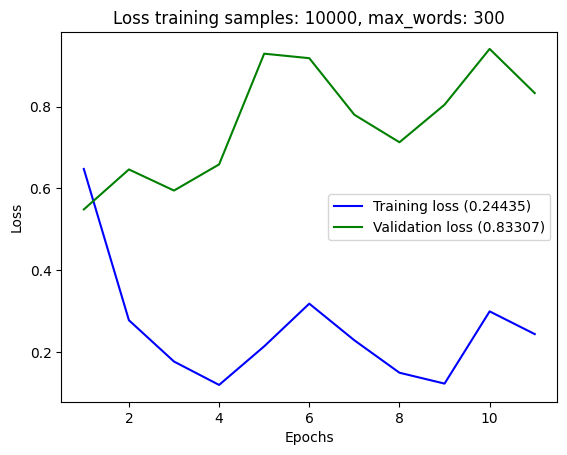

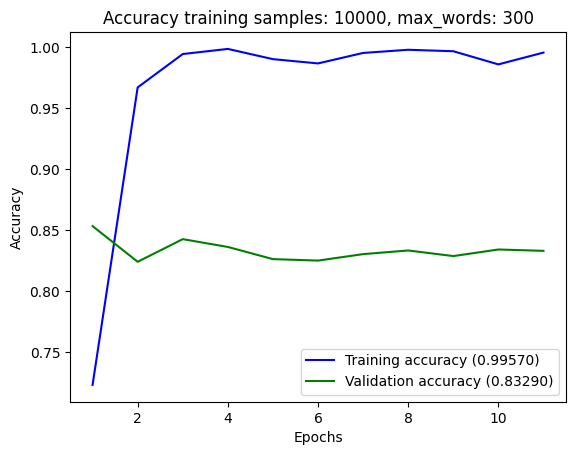

In [ ]:
training_samples = 10000
max_words = 300
history2 = learning_process_tests(training_samples, max_words)
plot_history(history2, training_samples, max_words)

# Scores:
- basic model (1 * 16 units): 0.8449
- 1 layer 32 units: 0.8409
- 2 layers both 16 units: 0.8476
- 16, 16 with elu: 0.8565
- 16, 16 LeakyReLU(0.1): 0.8523
- 32, 16 elu: 0.851

Best model: 16, 16, elu. Further changes:
- optimizer adam: 0.8629
- optimizer adam and dropout: 0.2: 0.8483
- dropout 0.3 between 2 hidden layers: 0.8329

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='rmsprop', n_dropout=0.3):

  max_features = 10000
  embedding_dim = 200
  maxlen=300

  model = Sequential()
  model.add(Embedding(max_features, embedding_dim, input_length=max_words))
  model.add(Flatten())
  model.add(Dropout(n_dropout))
  model.add(Dense(16, activation='elu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(16, activation='elu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
  return model

param_grid = {
    'n_dropout': [0.15, 0.2, 0.3],
    'optimizer': ['adam', 'rmsprop']
}

model_grid = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32)

<ipython-input-15-30004ff6aa7f>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_grid = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32)


In [ ]:
def learning_process_grid(training_samples=10000, maxlen=300):
  max_features = 10000
  validation_samples = 10000
  embedding_dim = 200

  x_train_o = pad_sequences(x_train_pre, maxlen=maxlen)

  x_train = x_train_o[:training_samples]
  y_train = y_train_o[:training_samples]
  x_val = x_train_o[training_samples: training_samples + validation_samples]
  y_val = y_train_o[training_samples: training_samples + validation_samples]

  grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=-1, cv=3)

  early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                       patience=6)

  history = grid.fit(x_train, y_train,
                      epochs=30,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping])


  return history

In [ ]:
history_grid = learning_process_grid()
plot_history(history, 10000, 300)

# Wnioski 3
Najlepsy model jaki udało się uzyskać wykorzystuje aktywacje elu, 2 warstwy po 16 neuronów i optimizer adam.
- zgodnie z przewidywaniami elu sprawuje sie lepiej niż relu, ale wydłuża czas trenowania modelu
- dodatkowa warstwa umożliwiła modelowi lepsze dopasowanie się
- adam okazał się bardziej optymalny do tego zadania

# Wykorzystanie Glove i innych embedderów dla modelu o najlepszych parametrach ustalonych wcześniej

In [ ]:
import numpy as np
def plot_histories_glove(history_dicts, embedding_dims):

  losses = [h['loss'] for h in history_dicts]
  val_losses = [h['val_loss'] for h in history_dicts]
  accs = [h['acc'] for h in history_dicts]
  val_accs = [h['val_acc'] for h in history_dicts]

  cmap = plt.cm.rainbow(np.linspace(0, 1, len(losses)))

  plt.figure(1)
  for i, l in enumerate(losses):
    dim = embedding_dims[i]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'train loss, embedding_dims: {dim}')
  plt.title('Training losses')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.figure(2)
  for i, l in enumerate(val_losses):
    dim = embedding_dims[i]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'val loss, embedding_dims: {dim}')
  plt.title('Validation losses')
  plt.xlabel('Epochs')
  plt.ylabel('Val Loss')
  plt.legend()

  plt.figure(3)
  for i, l in enumerate(accs):
    dim = embedding_dims[i]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'accuracy, embedding_dims: {dim}')
  plt.title('Accuracies')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracies')
  plt.legend()

  plt.figure(4)
  for i, l in enumerate(val_accs):
    dim = embedding_dims[i]
    epochs = range(len(l))
    plt.plot(epochs, l, c=cmap[i], label=f'val accuracy, embedding_dims: {dim}')
  plt.title('Val Accuracies')
  plt.xlabel('Epochs')
  plt.ylabel('Val Accuracies')
  plt.legend()
  plt.show()


In [ ]:
from google.colab import drive
drive.mount('/mnt/drive')

Mounted at /mnt/drive


In [2]:
import os


imdb_dir = 'ml/data/aclImdb'
# imdb_dir = '/mnt/drive/MyDrive/GGSN/data/aclImdb'
train_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for i, fname in enumerate(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding ="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [3]:
from keras.preprocessing.text import Tokenizer

# maxlen = 200  # We will cut reviews after 100 words
# training_samples = 2000  # We will be training on 200 samples
validation_samples = 5000  # We will be validating on 10,000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 87393 unique tokens.


In [ ]:
import numpy as np
# glove_dir = 'ml/word_vectors'
glove_dir = '/mnt/drive/MyDrive/GGSN/word_vectors'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding ="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
all_histories_dict = []
embedding_dims = []

In [10]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dropout, Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

def learning_process_with_glove(training_samples=2000, maxlen=200):

  data = pad_sequences(sequences, maxlen=maxlen)

  labels_arr = np.asarray(labels)

  indices = np.arange(data.shape[0])
  np.random.shuffle(indices)
  data = data[indices]
  labels_arr = labels_arr[indices]

  x_train = data[:training_samples]
  y_train = labels_arr[:training_samples]
  x_val = data[training_samples: training_samples + validation_samples]
  y_val = labels_arr[training_samples: training_samples + validation_samples]

  model = Sequential()
  model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
  model.add(Flatten())
  model.add(Dropout(0.3))
  # model.add(Dense(16, activation='elu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(16, activation='elu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(1, activation='sigmoid'))

  model.layers[0].set_weights([embedding_matrix])
  model.layers[0].trainable = False
  # model.summary()

  early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                       patience=8,
                                       restore_best_weights=True)
  
  checkpoint_callback = ModelCheckpoint(filepath='ml/models/imdb.h5',
                                    monitor="val_acc",
                                    save_best_only=True)

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

  epochs = 40
  print(f'Training WIHOUT embedding layer for {epochs} epochs')
  history = model.fit(x_train, y_train,
                      epochs=epochs,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping, checkpoint_callback])

  val = history.history['val_acc'][-1]
  print(f'val accuracy: {val}')

  print(f'Training with embedding layer for {epochs} epochs')

  model.layers[0].trainable = True
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
                metrics=['acc'])

  history = model.fit(x_train, y_train,
                      epochs=epochs,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping, checkpoint_callback])

  model.save('ml/models/imdb.h5')
  # all_histories_dict.append(history.history)
  # embedding_dims.append(embedding_dim)

  return history

In [ ]:
training_samples = 5000
maxlen = 300
history_glove = learning_process_with_glove(training_samples, max_words)
# plot_history(history_glove, training_samples, max_words)

Training WIHOUT embedding layer for 20 epochs
Epoch 1/20
157/157 [==============================] - 368s 2s/step - loss: 0.7922 - acc: 0.5596 - val_loss: 0.7106 - val_acc: 0.6282
Epoch 2/20
157/157 [==============================] - 348s 2s/step - loss: 0.6249 - acc: 0.7622 - val_loss: 0.7772 - val_acc: 0.6866
Epoch 3/20
157/157 [==============================] - 346s 2s/step - loss: 0.3853 - acc: 0.9148 - val_loss: 0.8179 - val_acc: 0.7045
Epoch 4/20
157/157 [==============================] - 349s 2s/step - loss: 0.2887 - acc: 0.9582 - val_loss: 1.0093 - val_acc: 0.6952
Epoch 5/20
157/157 [==============================] - 341s 2s/step - loss: 0.2393 - acc: 0.9740 - val_loss: 1.2031 - val_acc: 0.6775
Epoch 6/20
157/157 [==============================] - 346s 2s/step - loss: 0.2220 - acc: 0.9800 - val_loss: 1.4019 - val_acc: 0.6599
val accuracy: 0.6599000096321106
Training with embedding layer for 20 epochs
Epoch 1/20
157/157 [==============================] - 443s 3s/step - loss: 0.56

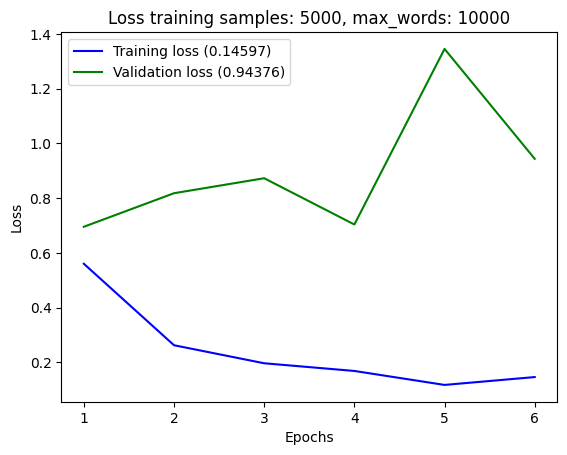

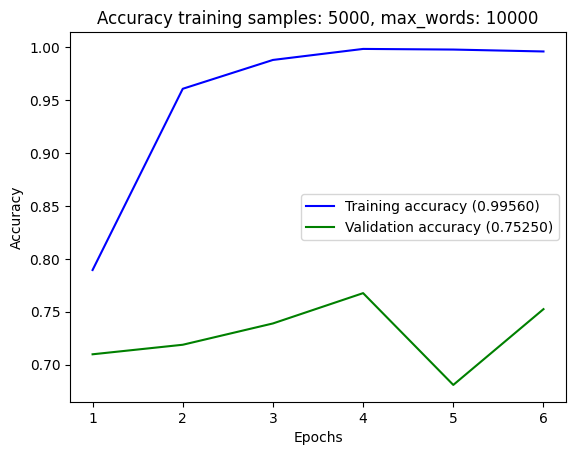

In [ ]:
plot_history(history_glove, training_samples, max_words)

# Wstępne eksperymenty pokazały, że w tym przypadku druga warswa dense psuje wyniki, dalej ograniczę się do jednej

In [ ]:
training_samples = 5000
maxlen = 300
history_glove = learning_process_with_glove(training_samples, max_words)

Training WIHOUT embedding layer for 20 epochs
Epoch 1/20
157/157 [==============================] - 286s 2s/step - loss: 0.7514 - acc: 0.6066 - val_loss: 0.6336 - val_acc: 0.7110
Epoch 2/20
157/157 [==============================] - 290s 2s/step - loss: 0.6216 - acc: 0.7124 - val_loss: 0.6153 - val_acc: 0.7110
Epoch 3/20
157/157 [==============================] - 296s 2s/step - loss: 0.6562 - acc: 0.7118 - val_loss: 0.7140 - val_acc: 0.7132
Epoch 4/20
157/157 [==============================] - 304s 2s/step - loss: 0.6398 - acc: 0.7854 - val_loss: 0.6820 - val_acc: 0.7550
Epoch 5/20
157/157 [==============================] - 298s 2s/step - loss: 0.4302 - acc: 0.9124 - val_loss: 0.6875 - val_acc: 0.7580
Epoch 6/20
157/157 [==============================] - 299s 2s/step - loss: 0.3136 - acc: 0.9606 - val_loss: 0.7433 - val_acc: 0.7694
Epoch 7/20
157/157 [==============================] - 300s 2s/step - loss: 0.2754 - acc: 0.9806 - val_loss: 0.7849 - val_acc: 0.7544
Epoch 8/20
157/157 [===

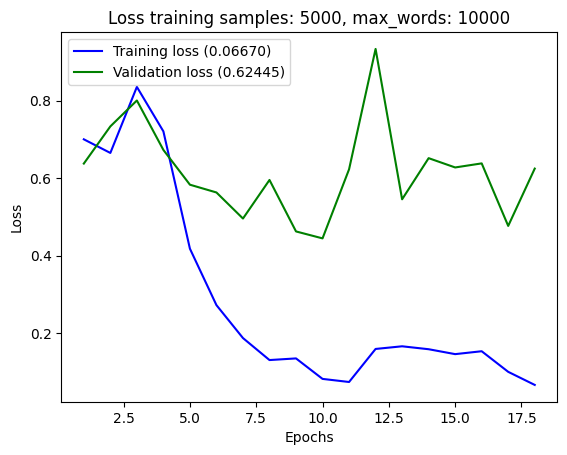

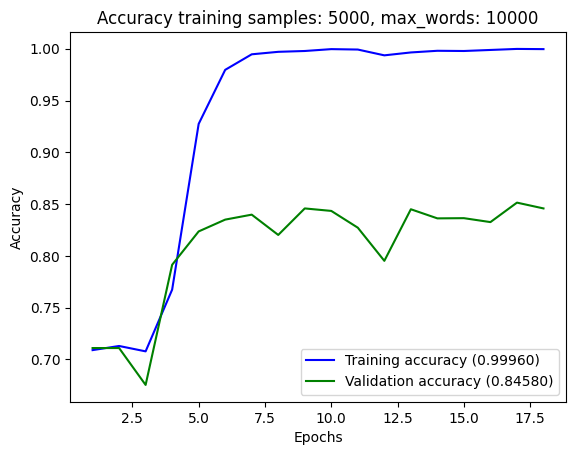

In [ ]:
plot_history(history_glove, training_samples, max_words)

In [ ]:
import numpy as np
# glove_dir = 'ml/word_vectors'
glove_dir = '/mnt/drive/MyDrive/GGSN/word_vectors'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding ="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_dim = 50

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Training WIHOUT embedding layer for 20 epochs
Epoch 1/20
157/157 [==============================] - 78s 485ms/step - loss: 0.6179 - acc: 0.7156 - val_loss: 0.5717 - val_acc: 0.7362
Epoch 2/20
157/157 [==============================] - 74s 469ms/step - loss: 0.4931 - acc: 0.8006 - val_loss: 0.5540 - val_acc: 0.7536
Epoch 3/20
157/157 [==============================] - 72s 461ms/step - loss: 0.3985 - acc: 0.8634 - val_loss: 0.6235 - val_acc: 0.7460
Epoch 4/20
157/157 [==============================] - 82s 524ms/step - loss: 0.3257 - acc: 0.8968 - val_loss: 0.6240 - val_acc: 0.7506
Epoch 5/20
157/157 [==============================] - 80s 508ms/step - loss: 0.2670 - acc: 0.9316 - val_loss: 0.6643 - val_acc: 0.7424
Epoch 6/20
157/157 [==============================] - 73s 467ms/step - loss: 0.2210 - acc: 0.9500 - val_loss: 0.7277 - val_acc: 0.7492
Epoch 7/20
157/157 [==============================] - 72s 461ms/step - loss: 0.1909 - acc: 0.9662 - val_loss: 0.7581 - val_acc: 0.7512
Epoch 8/2

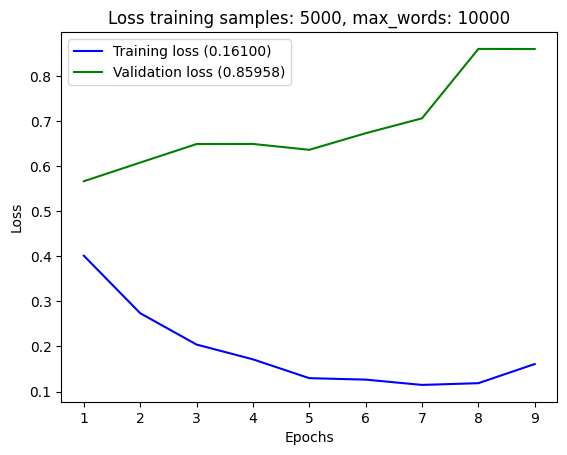

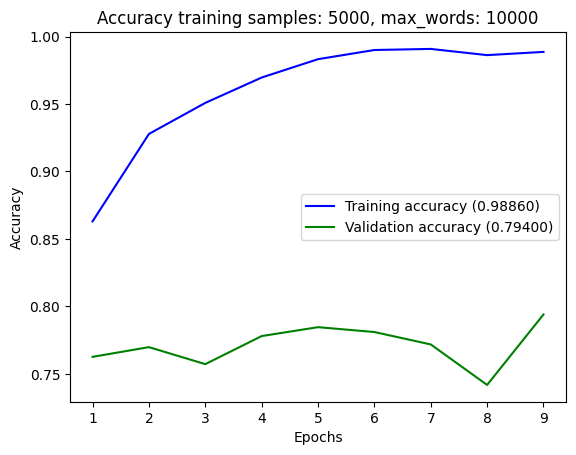

In [ ]:
training_samples = 5000
maxlen = 300
history_glove2 = learning_process_with_glove(training_samples, max_words)
plot_history(history_glove2, training_samples, max_words)

In [ ]:
glove_dir = '/mnt/drive/MyDrive/GGSN/word_vectors'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'), encoding ="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Training WIHOUT embedding layer for 20 epochs
Epoch 1/20
157/157 [==============================] - 11s 68ms/step - loss: 0.7125 - acc: 0.6908 - val_loss: 0.5659 - val_acc: 0.7514
Epoch 2/20
157/157 [==============================] - 10s 61ms/step - loss: 0.3544 - acc: 0.8964 - val_loss: 0.5455 - val_acc: 0.7758
Epoch 3/20
157/157 [==============================] - 9s 59ms/step - loss: 0.2150 - acc: 0.9756 - val_loss: 0.6085 - val_acc: 0.7708
Epoch 4/20
157/157 [==============================] - 10s 67ms/step - loss: 0.1519 - acc: 0.9918 - val_loss: 0.6319 - val_acc: 0.7588
Epoch 5/20
157/157 [==============================] - 10s 62ms/step - loss: 0.1230 - acc: 0.9976 - val_loss: 0.6346 - val_acc: 0.7688
Epoch 6/20
157/157 [==============================] - 9s 59ms/step - loss: 0.1088 - acc: 0.9972 - val_loss: 0.6578 - val_acc: 0.7678
Epoch 7/20
157/157 [==============================] - 10s 67ms/step - loss: 0.1064 - acc: 0.9972 - val_loss: 0.6819 - val_acc: 0.7466
Epoch 8/20
157/157

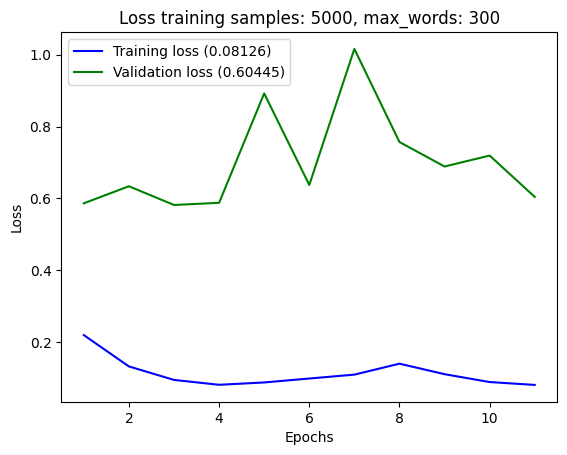

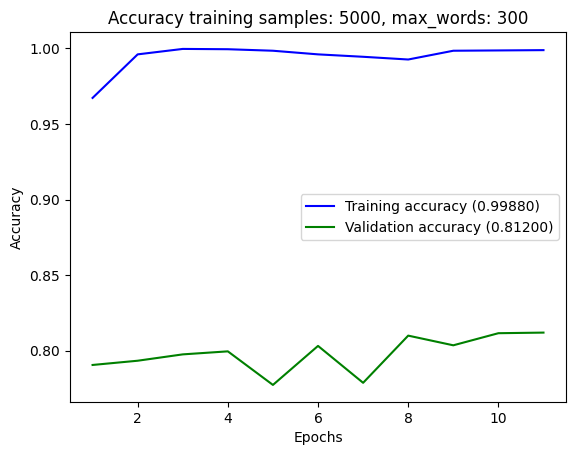

In [ ]:
training_samples = 5000
maxlen = 300
history_glove3 = learning_process_with_glove(training_samples, maxlen)
plot_history(history_glove3, training_samples, maxlen)

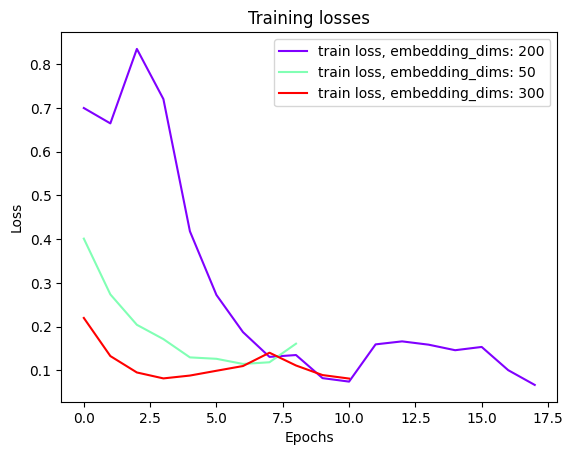

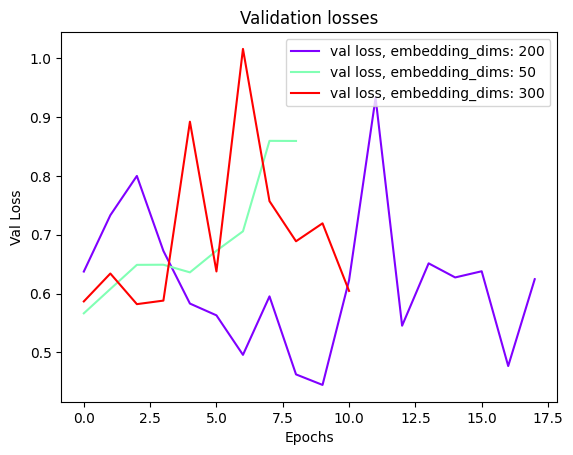

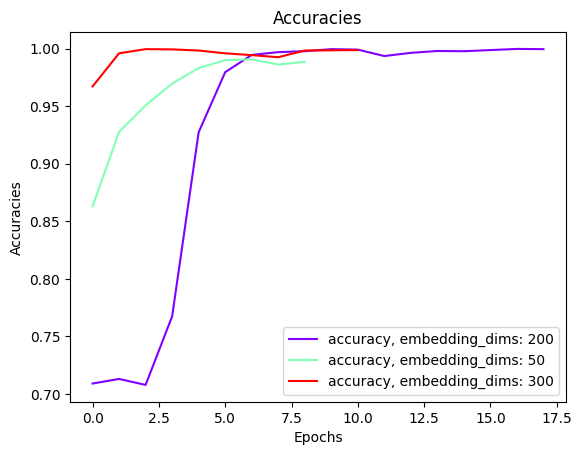

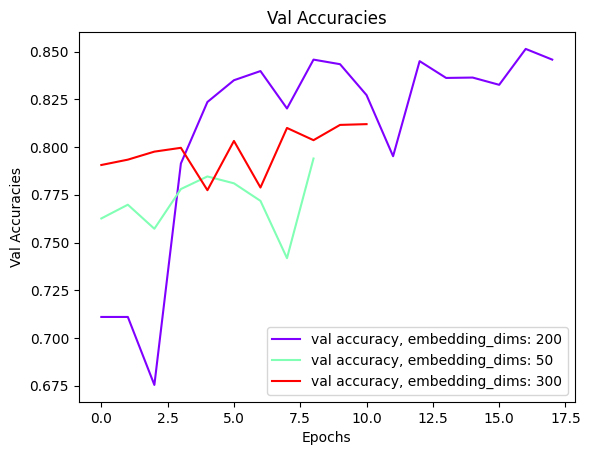

In [ ]:
plot_histories_glove(all_histories_dict, embedding_dims)

# 200 wymiarów dał najlepsze wyniki, trochę gorsze niż uczenie własnej warstwy embedding, ale ograniczyłem ilość danych treningowych, powtórzę eksperyment dla 10000

Training WIHOUT embedding layer for 20 epochs
Epoch 1/20
313/313 [==============================] - 15s 45ms/step - loss: 0.6532 - acc: 0.7054 - val_loss: 0.6040 - val_acc: 0.7080
Epoch 2/20
313/313 [==============================] - 15s 48ms/step - loss: 0.5275 - acc: 0.7869 - val_loss: 0.5741 - val_acc: 0.7759
Epoch 3/20
313/313 [==============================] - 14s 44ms/step - loss: 0.3737 - acc: 0.8967 - val_loss: 0.5830 - val_acc: 0.7866
Epoch 4/20
313/313 [==============================] - 14s 46ms/step - loss: 0.2968 - acc: 0.9354 - val_loss: 0.6449 - val_acc: 0.7830
Epoch 5/20
313/313 [==============================] - 14s 44ms/step - loss: 0.2501 - acc: 0.9586 - val_loss: 0.6760 - val_acc: 0.7901
Epoch 6/20
313/313 [==============================] - 14s 44ms/step - loss: 0.2312 - acc: 0.9654 - val_loss: 0.6885 - val_acc: 0.7788
Epoch 7/20
313/313 [==============================] - 14s 44ms/step - loss: 0.2311 - acc: 0.9664 - val_loss: 0.7490 - val_acc: 0.7653
Epoch 8/20
313/3

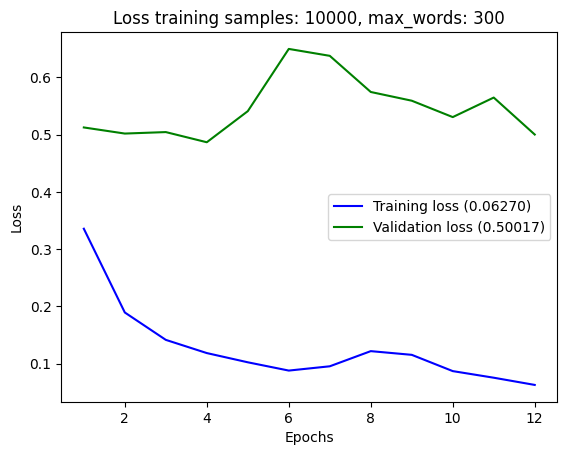

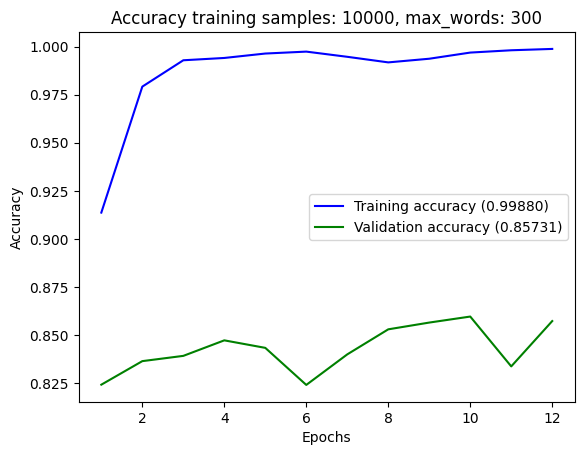

In [ ]:
training_samples = 10000
maxlen = 300
history_glove3 = learning_process_with_glove(training_samples, maxlen)
plot_history(history_glove3, training_samples, maxlen)

# Wnioski 4
- wymiar przestrzeni 50 okazał się za małą ilością, natomiast 200 i 300 dają podobnę wyniki, mimo wszystko lepszym wymiarem wydaje się 200
- wykorzystanie glove dało przyzwoite wyniki, ale dalej minimalnie gorsze niż wytrenowanie własnej warstwy embedding

# Inne zbiory osadzeń:

In [ ]:
import numpy as np
# glove_dir = 'ml/word_vectors'
glove_dir = '/mnt/drive/MyDrive/GGSN/word_vectors'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding ="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
training_samples = 5000
maxlen = 300
history_twitter = learning_process_with_glove(training_samples, max_words)
plot_history(history_twitter, training_samples, maxlen)

Training WIHOUT embedding layer for 20 epochs
Epoch 1/20
157/157 [==============================] - 279s 2s/step - loss: 0.7017 - acc: 0.6416 - val_loss: 0.6278 - val_acc: 0.7112
Epoch 2/20
157/157 [==============================] - 291s 2s/step - loss: 0.6480 - acc: 0.7250 - val_loss: 0.6466 - val_acc: 0.7454
Epoch 3/20
157/157 [==============================] - 288s 2s/step - loss: 0.5735 - acc: 0.8298 - val_loss: 0.7575 - val_acc: 0.7512
Epoch 4/20
157/157 [==============================] - 295s 2s/step - loss: 0.4104 - acc: 0.9448 - val_loss: 0.7744 - val_acc: 0.7610
Epoch 5/20
157/157 [==============================] - 289s 2s/step - loss: 0.3097 - acc: 0.9766 - val_loss: 0.9581 - val_acc: 0.7578
Epoch 6/20
157/157 [==============================] - 298s 2s/step - loss: 0.3017 - acc: 0.9842 - val_loss: 0.8950 - val_acc: 0.7612
Epoch 7/20
157/157 [==============================] - 295s 2s/step - loss: 0.2861 - acc: 0.9870 - val_loss: 0.8626 - val_acc: 0.7572
Epoch 8/20
157/157 [===

NameError: name 'all_histories_dict' is not defined

**UWAGA**
Tutaj przez bład nie ma wykresu i brakuje mi czasu, żeby uczyć model ponownie, ale po historii nauki widać, że model nie był lepszy niż dla glove

# Common Crawl 42B

In [6]:
import numpy as np
glove_dir = 'ml/word_vectors'
# glove_dir = '/mnt/drive/MyDrive/GGSN/word_vectors'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.42B.300d.txt'), encoding ="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [11]:
training_samples = 5000
maxlen = 300
history_twitter = learning_process_with_glove(training_samples, max_words)
plot_history(history_twitter, training_samples, maxlen)

Training WIHOUT embedding layer for 40 epochs
Epoch 1/40
157/157 [==============================] - 126s 802ms/step - loss: 0.9083 - acc: 0.5066 - val_loss: 0.7411 - val_acc: 0.4950
Epoch 2/40
157/157 [==============================] - 127s 809ms/step - loss: 0.7219 - acc: 0.5224 - val_loss: 0.7519 - val_acc: 0.5984
Epoch 3/40
157/157 [==============================] - 114s 729ms/step - loss: 0.7526 - acc: 0.6822 - val_loss: 0.8536 - val_acc: 0.6736
Epoch 4/40
157/157 [==============================] - 124s 792ms/step - loss: 0.5499 - acc: 0.8364 - val_loss: 0.8473 - val_acc: 0.6882
Epoch 5/40
157/157 [==============================] - 119s 760ms/step - loss: 0.4269 - acc: 0.9232 - val_loss: 0.8771 - val_acc: 0.7144
Epoch 6/40
157/157 [==============================] - 118s 749ms/step - loss: 0.3812 - acc: 0.9500 - val_loss: 0.9168 - val_acc: 0.7222
Epoch 7/40
157/157 [==============================] - 107s 684ms/step - loss: 0.3340 - acc: 0.9674 - val_loss: 1.0887 - val_acc: 0.7056
Ep

: 

**UWAGA**
Tutaj tuż przed przerwaniem nauki w wyniku early Stoppingu doszło do błędu z nieznanej przyczyny(kernel crash). Wyniki ponownie nie były lepsze niż osadzenie Glove

# Wnioski 5
- bardziej skomplikowane i obdzerniejsze osadznia (Twitter i CommonCrawl42B) nie sprawdziły się dla tego zbioru. Być może liczba parametrów była już zbyt duża i model się przeuczał

# PODSUMOWANIE 
**Czego się nauczyłem**
- sposoby reprezentacji danych sekwencyjnych, one-hot, hash one-hot, word embeddings
- wykorzystywanie wstępnie wytrenowanych osadzeń słów
- koncepcja warstwy osadzenia
- wykorzystanie warstwy Embedding z kerasa
- znączące różnice w wynikach modeli w zależnośći od wykorzystanej liczby słów (i danych treningowych, ale to dość oczywiste)
- przydatność EarlyStoppingu w pracy na modelach skłonnych do przeuczania się
- znaczenie ilości wymiarów przestrzeni osadzenia dla wyników i zwrócenie uwagi, aby dla prostego problemu nie było ich za dużo